# Package install

In [ ]:
!jupyter nbextension install --sys-prefix --symlink --overwrite --py evidently
!jupyter nbextension enable evidently --py --sys-prefix

Installing /Users/bhc/opt/anaconda3/envs/evidently/lib/python3.8/site-packages/evidently/nbextension/static -> evidently
Removing: /Users/bhc/opt/anaconda3/envs/evidently/share/jupyter/nbextensions/evidently
Symlinking: /Users/bhc/opt/anaconda3/envs/evidently/share/jupyter/nbextensions/evidently -> /Users/bhc/opt/anaconda3/envs/evidently/lib/python3.8/site-packages/evidently/nbextension/static
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable evidently --py --sys-prefix
    
Enabling notebook extension evidently/extension...
      - Validating: OK


In [137]:
import evidently

import pandas as pd
import numpy as np

from sklearn import datasets, ensemble
from sklearn.preprocessing import LabelEncoder

from evidently import ColumnMapping

from evidently.report import Report
from evidently.metrics.base_metric import generate_column_metrics
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset, DataQualityPreset, RegressionPreset
from evidently.metrics import *
from evidently.metrics.data_drift.embedding_drift_methods import model, distance, ratio, mmd

from evidently.test_suite import TestSuite
from evidently.tests.base_test import generate_column_tests
from evidently.test_preset import DataStabilityTestPreset, NoTargetPerformanceTestPreset, RegressionTestPreset
from evidently.tests import *

import PIL

In [26]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Singapore Fashion Facebook Post Dataset

싱가폴 페이스북에서 패션과 관련된 포스팅을 모은 텍스트 데이터셋

[Dataset Link](https://www.kaggle.com/datasets/annguyennt/singapore-fashion-facebook-posts)

In [317]:
df = pd.read_csv('datasets/facebook_post.csv')

df.sample(3)

Brand       post_id  \
342                DMK  2.543501e+15   
2135  Design & Comfort  1.575516e+15   
1884  Design & Comfort  2.259176e+15   

                                              post_text                 time  \
342                                                 NaN  2019-03-04 09:02:03   
2135  Class doesn't have to be expensive with D&C's ...  2017-11-26 08:00:00   
1884  No one can stop you from shinning if you are s...  2019-04-13 18:46:19   

      likes  comments  shares  \
342     186         0       0   
2135     12         0       0   
1884      9         1       0   

                                               post_url  sentiment_score  \
342   https://facebook.com/DMKShoes/posts/2543500779...              0.0   
2135  https://facebook.com/DesignComfortSG/posts/157...              NaN   
1884  https://facebook.com/DesignComfortSG/posts/225...              NaN   

      sentiment_magnitude  
342                   0.0  
2135                  NaN  
1884                  NaN

In [318]:
sent = df.loc[2]['post_text']

sent

'Sweet dreams are made of these - Bubble Dream Heel Sandals ☁️😇\n \n Shop via link in bio✨\n \n #DMKSHOES #journeywithcourage'

In [319]:
len(df)

4010

In [320]:
df.isnull().sum()

Brand                     0
post_id                   1
post_text              1416
time                      0
likes                     0
comments                  0
shares                    0
post_url                  1
sentiment_score        1531
sentiment_magnitude    1531
dtype: int64

In [321]:
df.dropna(subset=['post_text'], inplace=True)

len(df)

2594

In [322]:
df.isnull().sum()

Brand                     0
post_id                   0
post_text                 0
time                      0
likes                     0
comments                  0
shares                    0
post_url                  0
sentiment_score        1167
sentiment_magnitude    1167
dtype: int64

In [323]:
df['date'] = pd.to_datetime(df['time'])
df.set_index('date', inplace=True)
df = df.sort_index(ascending=True)

df.head()

Brand       post_id  \
date                                                  
2011-12-27 16:37:39               DMK  1.562596e+14   
2012-02-24 12:26:33  Design & Comfort  3.512579e+14   
2012-02-25 20:22:10  Design & Comfort  3.519480e+14   
2012-02-27 13:19:33  Design & Comfort  3.529709e+14   
2012-03-03 12:36:57  Design & Comfort  3.561593e+14   

                                                             post_text  \
date                                                                     
2011-12-27 16:37:39  Stay tuned to our official web page www.dmk.co...   
2012-02-24 12:26:33  Thank you for liking our page! We will be post...   
2012-02-25 20:22:10  We have moved out of Iluma. Thank you for the ...   
2012-02-27 13:19:33  Thank you for liking our page! We will be post...   
2012-03-03 12:36:57  Simply spend $100 in a single receipt at any o...   

                                    time  likes  comments  shares  \
date                                                                
2011-12-27 16:37:39  2011-12-27 16:37:39      3         0       0   
2012-02-24 12:26:33  2012-02-24 12:26:33      1         0       0   
2012-02-25 20:22:10  2012-02-25 20:22:10      1         0       0   
2012-02-27 13:19:33  2012-02-27 13:19:33      2         0       0   
2012-03-03 12:36:57  2012-03-03 12:36:57      0         0       0   

                                                              post_url  \
date                                                                     
2011-12-27 16:37:39  https://facebook.com/DMKShoes/posts/1562596044...   
2012-02-24 12:26:33  https://facebook.com/DesignComfortSG/posts/351...   
2012-02-25 20:22:10  https://facebook.com/DesignComfortSG/posts/351...   
2012-02-27 13:19:33  https://facebook.com/DesignComfortSG/posts/352...   
2012-03-03 12:36:57  https://facebook.com/DesignComfortSG/posts/356...   

                     sentiment_score  sentiment_magnitude  
date                                                       
2011-12-27 16:37:39              0.3                  0.3  
2012-02-24 12:26:33              NaN                  NaN  
2012-02-25 20:22:10              NaN                  NaN  
2012-02-27 13:19:33              NaN                  NaN  
2012-03-03 12:36:57              NaN                  NaN

In [324]:
df.tail()

Brand       post_id  \
date                                                 
2021-04-02 21:00:01  Charles & Keith  1.015894e+16   
2021-04-03 09:00:00  Charles & Keith  1.015894e+16   
2021-04-03 09:00:00  Charles & Keith  1.015894e+16   
2021-04-03 11:36:51              DMK  5.311750e+15   
2021-04-03 18:30:20  Charles & Keith  1.015895e+16   

                                                             post_text  \
date                                                                     
2021-04-02 21:00:01  Dial up the luxe factor with our patent knotte...   
2021-04-03 09:00:00  SALE: UP TO 50% OFF*\n Selected Bag Styles\n \...   
2021-04-03 09:00:00  SALE: UP TO 50% OFF*\n Selected Bag Styles\n \...   
2021-04-03 11:36:51  Start on the right foot for your first impress...   
2021-04-03 18:30:20  The epitome of functional fashion, our drawstr...   

                                    time  likes  comments  shares  \
date                                                                
2021-04-02 21:00:01  2021-04-02 21:00:01    523         4       0   
2021-04-03 09:00:00  2021-04-03 09:00:00    390         7       0   
2021-04-03 09:00:00  2021-04-03 09:00:00      7         2       0   
2021-04-03 11:36:51  2021-04-03 11:36:51    177         0       0   
2021-04-03 18:30:20  2021-04-03 18:30:20    183         6       0   

                                                              post_url  \
date                                                                     
2021-04-02 21:00:01  https://facebook.com/charleskeithofficial/post...   
2021-04-03 09:00:00  https://facebook.com/charleskeithofficial/post...   
2021-04-03 09:00:00  https://facebook.com/charleskeithofficial/post...   
2021-04-03 11:36:51  https://facebook.com/DMKShoes/posts/5311745528...   
2021-04-03 18:30:20  https://facebook.com/charleskeithofficial/vide...   

                     sentiment_score  sentiment_magnitude  
date                                                       
2021-04-02 21:00:01              0.2                  0.6  
2021-04-03 09:00:00              0.0                  0.2  
2021-04-03 09:00:00              0.0                  0.1  
2021-04-03 11:36:51              0.2                  0.7  
2021-04-03 18:30:20              0.4                  1.4

In [325]:
len(df)

2594

## 연 단위로 데이터 정제

In [326]:
df_2012 = df.loc['2012-01-01' : '2012-12-31']
df_2013 = df.loc['2013-01-01' : '2013-12-31']
df_2014 = df.loc['2014-01-01' : '2014-12-31']
df_2015 = df.loc['2015-01-01' : '2015-12-31']
df_2016 = df.loc['2016-01-01' : '2016-12-31']
df_2017 = df.loc['2017-01-01' : '2017-12-31']
df_2018 = df.loc['2018-01-01' : '2018-12-31']
df_2019 = df.loc['2019-01-01' : '2019-12-31']
df_2020 = df.loc['2020-01-01' : '2020-12-31']
df_2021 = df.loc['2021-01-01' : '2021-12-31']

In [327]:
cnt = 2012

for i in range(10):
    print(f'{cnt}년 Data 표본 수 : ', len(eval('df_' + str(cnt))))
    cnt += 1

2012년 Data 표본 수 :  17
2013년 Data 표본 수 :  2
2014년 Data 표본 수 :  1
2015년 Data 표본 수 :  35
2016년 Data 표본 수 :  105
2017년 Data 표본 수 :  304
2018년 Data 표본 수 :  166
2019년 Data 표본 수 :  720
2020년 Data 표본 수 :  928
2021년 Data 표본 수 :  315


## 연도별 데이터의 빈도 분석 및 워드클라우드 분석

### 자연어 처리 패키지 호출

In [328]:
import time

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

In [ ]:
nltk.download('all')

In [332]:
lem = WordNetLemmatizer()
tokenizer = TweetTokenizer()
stopword = set(STOPWORDS)

### 전처리 과정 정의

In [344]:
def text_process(df):
    ## clean text
    text_list = df.post_text.values
    # print(text_list)


    content = " ".join(text_list)
    cleaned_content = re.sub(r'[^\.\?\!\w\d\s]','',content)
    cleaned_content = cleaned_content.lower()
    # print(cleaned_content)


    ## tokenize
    word_tokens = nltk.word_tokenize(cleaned_content)
    tokens_pos = nltk.pos_tag(word_tokens)


    ## collect nouns
    NN_words = []
    for word, pos in tokens_pos:
        if 'NN' in pos:
            NN_words.append(word)
    # print(NN_words)


    ## lematization
    lemmatized_words = []
    for word in NN_words:
        new_word = lem.lemmatize(word)
        lemmatized_words.append(new_word)

    unique_NN_words = set(lemmatized_words)
    final_NN_words = lemmatized_words


    ## customized stopwords
    customized_stopwords = ['shoe', 'season', 'httpsbit', 'bag',
                            'fashion', 'style', 'pump', 'dc',
                            'day', 'look', 'today', 'pair', 'time',
                            'colour', 'accessory', 'collection',
                            'link', 'bio', 'httpbit', 'store', 'shop',
                            'www', 'product', 'com', 'online', 'sg',
                            'weekend', 'tomorrow', 'purchase', 'week']

    unique_NN_words1 = set(final_NN_words)
    for word in unique_NN_words1:
        if word in customized_stopwords:
            while word in final_NN_words: final_NN_words.remove(word)


    ## final text data
    text = " ".join(final_NN_words)

    return text


### 전체 데이터 워드 클라우드 생성

In [349]:
df_list = []
cnt = 2016

for i in range(6):
    df_list.append('df_'+str(cnt))
    cnt += 1

print(df_list)

['df_2016', 'df_2017', 'df_2018', 'df_2019', 'df_2020', 'df_2021']


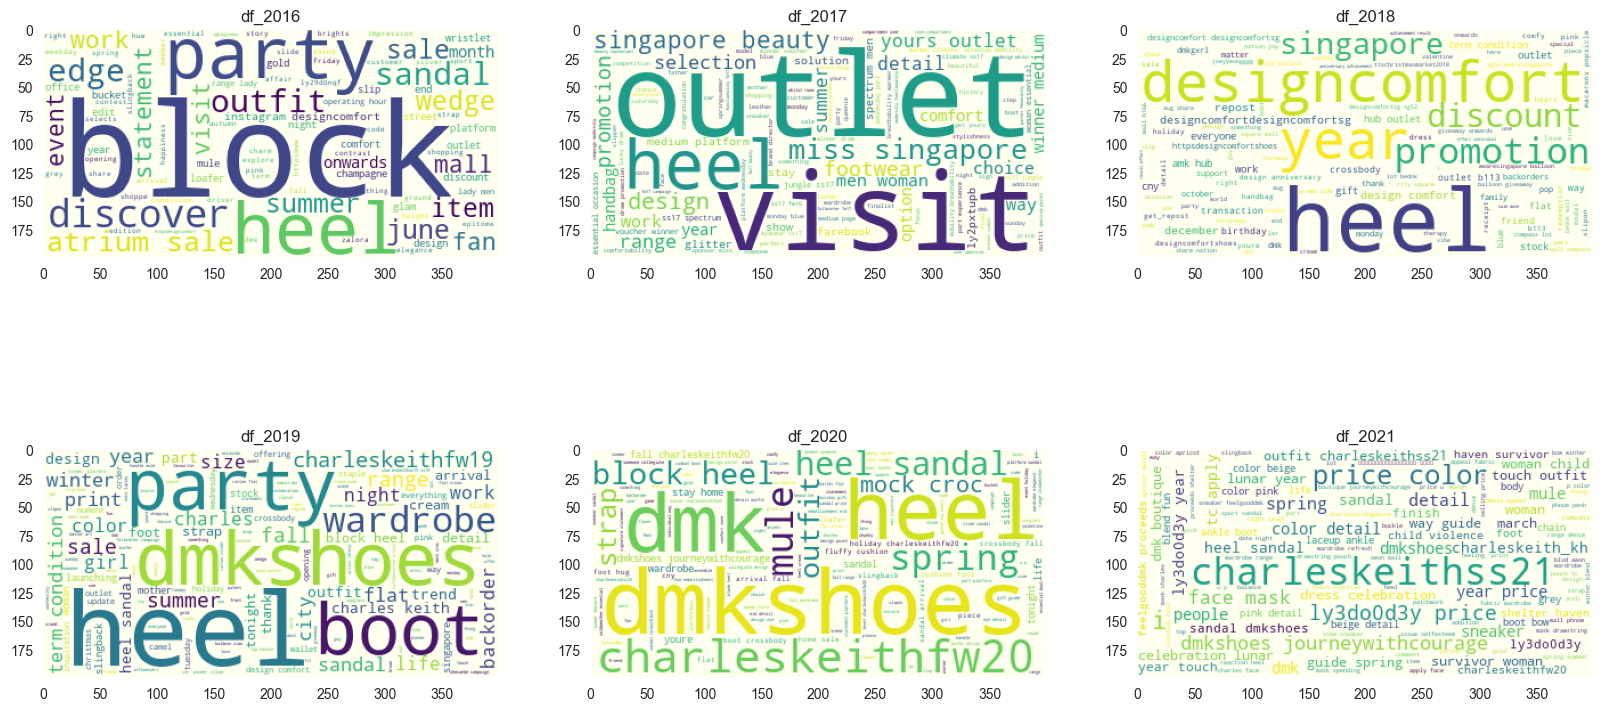

In [357]:
plt.figure(figsize=(20,10))

for i in range(len(df_list)):
    text = text_process(eval(df_list[i]))

    wc = WordCloud(
        background_color = "ivory",
        max_words = 200,
        stopwords = customized_stopwords
        ).generate(text)

    plt.subplot(2, 3, i+1)
    plt.title(df_list[i])
    plt.imshow(wc)

plt.show()

# Fashion Retail Sales Dataset

상점에서 의류 항목 별 판매량을 수집한 데이터셋<br>

[Dataset Link](https://www.kaggle.com/datasets/fekihmea/fashion-retail-sales)

In [358]:
org_df = pd.read_csv('datasets/Fashion_Retail_Sales.csv')

org_df.sample(10)

Customer Reference ID Item Purchased  Purchase Amount (USD)  \
1844                   4063           Vest                    NaN   
530                    4002       Jumpsuit                  193.0   
2559                   4085       Sneakers                   20.0   
2637                   3988       Leggings                   11.0   
1186                   4078       Tank Top                   45.0   
1858                   3996          Pants                    NaN   
1883                   4111  Flannel Shirt                  154.0   
747                    3970            Hat                    NaN   
3367                   4001         Gloves                   55.0   
3265                   4086          Skirt                   32.0   

     Date Purchase  Review Rating Payment Method  
1844    2023-05-29            2.9           Cash  
530     2022-12-18            4.0    Credit Card  
2559    2023-03-17            3.0           Cash  
2637    2022-11-25            4.9    Credit Card  
1186    2023-08-10            4.2    Credit Card  
1858    2022-10-23            4.4    Credit Card  
1883    2023-07-04            2.5    Credit Card  
747     2023-01-28            NaN    Credit Card  
3367    2022-12-06            4.9    Credit Card  
3265    2022-10-15            4.3           Cash

In [359]:
len(org_df)

3400

In [360]:
org_df.isnull().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [361]:
org_df.dropna(inplace=True)
org_df.isnull().sum()

Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64

In [362]:
len(org_df)

2487

In [363]:
org_df.keys()

Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method'],
      dtype='object')

In [364]:
encoder = LabelEncoder()
org_df['Item Purchased'] = encoder.fit_transform(org_df['Item Purchased'])

org_df.sample(10)

Customer Reference ID  Item Purchased  Purchase Amount (USD)  \
2305                   3958              28                  140.0   
1317                   4070              28                   70.0   
1890                   4059               5                  145.0   
82                     4017               5                   33.0   
3178                   3959              33                  147.0   
1469                   4093              38                   36.0   
1765                   4100               8                  102.0   
3171                   4031              19                  135.0   
2337                   4065              14                  133.0   
1985                   4107              24                  150.0   

     Date Purchase  Review Rating Payment Method  
2305    2022-12-17            2.0           Cash  
1317    2022-11-27            2.5           Cash  
1890    2022-12-24            1.1    Credit Card  
82      2023-09-28            3.3    Credit Card  
3178    2022-11-16            3.6           Cash  
1469    2023-04-30            2.3           Cash  
1765    2023-02-06            3.8           Cash  
3171    2023-04-21            4.9    Credit Card  
2337    2023-01-19            1.4           Cash  
1985    2023-04-09            1.1    Credit Card

In [365]:
encoder.classes_

array(['Backpack', 'Belt', 'Blazer', 'Blouse', 'Boots', 'Bowtie',
       'Camisole', 'Cardigan', 'Coat', 'Dress', 'Flannel Shirt',
       'Flip-Flops', 'Gloves', 'Handbag', 'Hat', 'Hoodie', 'Jacket',
       'Jeans', 'Jumpsuit', 'Kimono', 'Leggings', 'Loafers', 'Onesie',
       'Overalls', 'Pajamas', 'Pants', 'Polo Shirt', 'Poncho', 'Raincoat',
       'Romper', 'Sandals', 'Scarf', 'Shorts', 'Skirt', 'Slippers',
       'Sneakers', 'Socks', 'Sun Hat', 'Sunglasses', 'Sweater',
       'Swimsuit', 'T-shirt', 'Tank Top', 'Tie', 'Trench Coat',
       'Trousers', 'Tunic', 'Umbrella', 'Vest', 'Wallet'], dtype=object)

In [366]:
org_df['date'] = pd.to_datetime(org_df['Date Purchase'])
org_df.set_index('date', inplace=True)

org_df.head()

Customer Reference ID  Item Purchased  Purchase Amount (USD)  \
date                                                                       
2023-07-11                   4115              46                 2456.0   
2023-03-23                   4019              42                 2102.0   
2023-03-15                   4097              20                 3126.0   
2022-11-27                   3997              49                 3003.0   
2022-12-11                   4080              22                 2914.0   

           Date Purchase  Review Rating Payment Method  
date                                                    
2023-07-11    2023-07-11            2.0    Credit Card  
2023-03-23    2023-03-23            4.1           Cash  
2023-03-15    2023-03-15            3.2           Cash  
2022-11-27    2022-11-27            4.7           Cash  
2022-12-11    2022-12-11            4.5    Credit Card

In [367]:
org_df['Purchase Amount (USD)'].max()

4932.0

In [368]:
target = 'Purchase Amount (USD)'
numerical_features = ['Review Rating']
categorical_features = ['Item Purchased']

In [369]:
reference = org_df.loc['2022-10-02' : '2023-03-31']
current = org_df.loc['2023-04-01' : '2023-09-30']

In [370]:
len(reference)

1231

In [371]:
len(current)

1251

In [372]:
column_mapping = ColumnMapping()

column_mapping.target = target
column_mapping.numerical_features = numerical_features
column_mapping.categorical_features = categorical_features

In [373]:
target_drift = Report(
    metrics=[
    TargetDriftPreset()
    ],
    options={
        'render' : {"raw_data":True}
    }
)

target_drift.run(current_data=current,
                 reference_data=reference,
                 column_mapping=column_mapping
)

target_drift.show(mode='inline')

In [374]:
data_drift = Report(
    metrics = [
        DataDriftPreset()
    ],
    options={
        'render' : {"raw_data":True}
    }
)

data_drift.run(current_data = current,
               reference_data = reference,
               column_mapping=column_mapping)

data_drift.show(mode='inline')